fps検証

In [1]:
import cv2
import napari
import numpy as np
import matplotlib.pyplot as plt

path=r"C:\Users\y-yuk\Desktop\高速ライトシートPJ\追跡システム\C.elegans\230803\20230803190514-sheet9\rec.avi"

In [3]:
def extract_frame_from_avi(avi_file, frame_number):
    cap = cv2.VideoCapture(avi_file)
    if not cap.isOpened():
        print("Error: Failed to open the video file.")
        return
    current_frame = 0
    while current_frame < frame_number:
        ret, frame = cap.read()
        if not ret:
            print("Error: Unable to read frame.")
            return
        current_frame += 1
    cap.release()
    return frame


#https://tomtom-stock.com/2022/03/20/opencv-cv2-threshold/
def threshould(image, type, under):
    gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    if type == 0: #'otsu'
        _,thresh = cv2.threshold(gray,0,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    elif type == 1: #'binaly'
        _,thresh = cv2.threshold(gray,under,255,cv2.THRESH_BINARY)
    else:
        print("erro")
    return thresh


def find_counter_and_deleat(image, size):
    # 1 以上の値を持つピクセルの連続した集団を見つける
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # 各輪郭に対して処理を行う
    for contour in contours:
        # 輪郭の面積を計算
        area = cv2.contourArea(contour)
        # 面積が 10 未満の場合、輝度値を 0 に設定
        if area < size:
            cv2.drawContours(image, [contour], 0, 0, -1)  # -1 は輝度値を 0 に設定する意味
    return image


def edit_and_save_avi(input_file, output_file, types, unders, sizes):
    cap = cv2.VideoCapture(input_file)
    
    # 入力ファイルが正しく開かれているかを確認
    if not cap.isOpened():
        print("Error: Failed to open the input video file.")
        return
    
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    print("width", frame_width)
    print('height', frame_height)
    print('fps', fps)
    fourcc = cv2.VideoWriter_fourcc(*'MJPG')
    out = cv2.VideoWriter(output_file, fourcc, fps, (frame_width, frame_height))

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        frame_threshed = threshould(image=frame, type=types, under=unders)
        frame_deleated = find_counter_and_deleat(image=frame_threshed, size=sizes)
        
        try:
            out.write(frame_threshed)
        except:
            print("error")
            
    cap.release()
    out.release()
    print(f"Edited video saved as {output_file}")


def display_avi_with_napari(avi_file):
    # Open the Avi file
    cap = cv2.VideoCapture(avi_file)

    # Get the number of frames
    num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Number of frames in the Avi file: {num_frames}")

    # Store frames as a list of images
    frames = []
    for _ in range(num_frames):
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to read frame.")
            break
        frames.append(frame)

    # Check if frames were successfully loaded
    if not frames:
        print("Error: No frames were loaded from the Avi file.")
        return

    # Display frames with napari
    viewer = napari.Viewer()
    viewer.add_image(frames, rgb=True, multiscale=False)

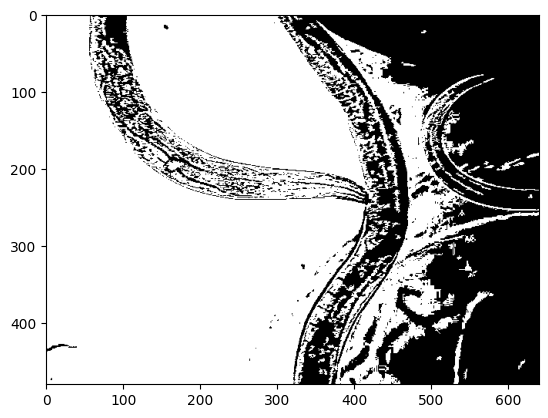

In [4]:
frame = extract_frame_from_avi(avi_file=path, frame_number=1000)
frame = threshould(image=frame, type=1, under=140) # otsu=0, binaly=1
frame = find_counter_and_deleat(image=frame, size=10)
plt.imshow(frame, cmap='gray')

In [86]:
output_file = "output1234.avi"
edit_and_save_avi(input_file=path, output_file=output_file, types=1, unders=140, sizes=10)

width 640
height 480
fps 35
Edited video saved as output1234.avi


In [77]:
# display_avi_with_napari(path)